In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import pandas as pd
from joblib import Parallel, delayed
from tqdm import tqdm
import multiprocessing
%matplotlib inline

In [2]:
# size = 20
# start = np.random.rand(1,2)
# start[0] = [0.5,0.5]
# des = np.random.rand(size,2)

# cc = np.concatenate((start, des), axis=0)
# # plt.scatter(city[:,0],city[:,1])
# plt.figure(0)
# plt.plot(start[:,0], start[:,1],'ko',des[:,0], des[:,1],'bo')
# for i in range(len(des)):
#     print("des[{}] = [{:.8f}, {:.8f}]".format(i,des[i,0],des[i,1]))

In [3]:
env = []
for i in range(5):
    env.append(np.random.rand(20,2))
env[0][0] = [0.07690058, 0.63935252]
env[0][1] = [0.61546189, 0.80365155]
env[0][2] = [0.84247201, 0.81052426]
env[0][3] = [0.35522798, 0.89829543]
env[0][4] = [0.01426304, 0.95698899]
env[0][5] = [0.92159681, 0.06048779]
env[0][6] = [0.25179378, 0.21985931]
env[0][7] = [0.34565902, 0.57045407]
env[0][8] = [0.98594842, 0.03611988]
env[0][9] = [0.48804409, 0.28195792]
env[0][10] = [0.85474782, 0.3025206 ]
env[0][11] = [0.59346739, 0.60630127]
env[0][12] = [0.03989808, 0.69505267]
env[0][13] = [0.06748413, 0.21995183]
env[0][14] = [0.41535267, 0.62674173]
env[0][15] = [0.74393668, 0.33945587]
env[0][16] = [0.74039158, 0.61575954]
env[0][17] = [0.14737193, 0.19344242]
env[0][18] = [0.89482608, 0.42823879]
env[0][19] = [0.53063128, 0.74161647]

env[1][0] = [0.54930753, 0.17323245]
env[1][1] = [0.12965323, 0.66832635]
env[1][2] = [0.66552128, 0.38442360]
env[1][3] = [0.90801382, 0.99998736]
env[1][4] = [0.84399447, 0.65173009]
env[1][5] = [0.86472277, 0.89959235]
env[1][6] = [0.69452760, 0.33163981]
env[1][7] = [0.09685189, 0.57790650]
env[1][8] = [0.15657803, 0.98780106]
env[1][9] = [0.62859840, 0.28451087]
env[1][10] = [0.29926868, 0.84140736]
env[1][11] = [0.25375098, 0.38581740]
env[1][12] = [0.62228415, 0.49871710]
env[1][13] = [0.21884802, 0.78082145]
env[1][14] = [0.02926973, 0.37119985]
env[1][15] = [0.46987959, 0.71104563]
env[1][16] = [0.13520079, 0.16351231]
env[1][17] = [0.56902284, 0.57112580]
env[1][18] = [0.86311127, 0.74052335]
env[1][19] = [0.11395521, 0.20445428]

env[2][0] = [0.86603561, 0.95304634]
env[2][1] = [0.33945950, 0.51440030]
env[2][2] = [0.68670310, 0.56147614]
env[2][3] = [0.54948796, 0.17946882]
env[2][4] = [0.57082568, 0.58258006]
env[2][5] = [0.29840265, 0.64446567]
env[2][6] = [0.92617501, 0.35873439]
env[2][7] = [0.82275673, 0.11553393]
env[2][8] = [0.14069381, 0.99662191]
env[2][9] = [0.70286300, 0.88277949]
env[2][10] = [0.57405253, 0.03246580]
env[2][11] = [0.55573937, 0.20520880]
env[2][12] = [0.31044032, 0.30913611]
env[2][13] = [0.88657570, 0.62246699]
env[2][14] = [0.86758903, 0.93064213]
env[2][15] = [0.34028163, 0.14489345]
env[2][16] = [0.91186460, 0.25250010]
env[2][17] = [0.30766992, 0.70223782]
env[2][18] = [0.15791795, 0.23200796]
env[2][19] = [0.07470997, 0.85091218]

env[3][0] = [0.46630041, 0.03199816]
env[3][1] = [0.60179804, 0.01956694]
env[3][2] = [0.53499192, 0.87153379]
env[3][3] = [0.53861537, 0.59962586]
env[3][4] = [0.60646905, 0.85846759]
env[3][5] = [0.50598385, 0.40775693]
env[3][6] = [0.98141429, 0.11731949]
env[3][7] = [0.84264157, 0.89302460]
env[3][8] = [0.16963787, 0.40055401]
env[3][9] = [0.72057150, 0.73507166]
env[3][10] = [0.92975615, 0.14811321]
env[3][11] = [0.82195119, 0.69380582]
env[3][12] = [0.44675742, 0.72114028]
env[3][13] = [0.62909727, 0.92706589]
env[3][14] = [0.13291872, 0.27488526]
env[3][15] = [0.65533497, 0.82306444]
env[3][16] = [0.88945725, 0.07866259]
env[3][17] = [0.25226204, 0.47939801]
env[3][18] = [0.00387767, 0.05687605]
env[3][19] = [0.17630150, 0.71264876]

env[4][0] = [0.57521879, 0.82909657]
env[4][1] = [0.63642682, 0.35831569]
env[4][2] = [0.84414721, 0.03212308]
env[4][3] = [0.46372188, 0.08467713]
env[4][4] = [0.67343455, 0.57410040]
env[4][5] = [0.63956391, 0.82604860]
env[4][6] = [0.77905483, 0.51912140]
env[4][7] = [0.17096540, 0.44733066]
env[4][8] = [0.76369255, 0.12297512]
env[4][9] = [0.49482687, 0.91963574]
env[4][10] = [0.19172358, 0.39969843]
env[4][11] = [0.70719173, 0.72161297]
env[4][12] = [0.32468534, 0.93397095]
env[4][13] = [0.53995583, 0.87325847]
env[4][14] = [0.77530987, 0.57452352]
env[4][15] = [0.98709477, 0.13069307]
env[4][16] = [0.36655024, 0.33122815]
env[4][17] = [0.66722143, 0.71244668]
env[4][18] = [0.75463233, 0.50898135]
env[4][19] = [0.57218765, 0.39069684]

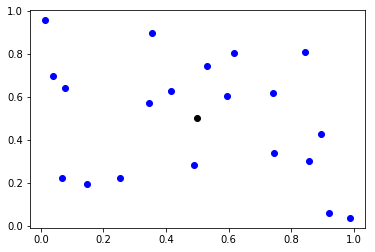

In [4]:
start = np.random.rand(1,2)
start[0] = [0.5,0.5]
des = env[0]
cc = np.concatenate((start, des), axis=0)
plt.figure(0)
plt.plot(start[:,0], start[:,1],'ko',des[:,0], des[:,1],'bo')
# cc

In [5]:
color = ['b','g','r','c','m','y','k']

In [6]:
# distances = {}
# for i,posi in enumerate(cc):
#     for j,posj in enumerate(cc):
#         if j>i:
#             key = (i,j)
#             distances[key] = math.sqrt(sum( (posi-posj) ** 2 ))
            
            
def showGraph(travel,marker = 'r--'):
    if len(travel) > 0:
        t = [cc[travel[0]]]
        for i in range(1,len(travel)):
            t = np.append(t, [cc[travel[i]]], axis=0)
        t = np.append(t, [cc[travel[0]]], axis=0)
        
        plt.plot(start[:,0], start[:,1],'ko',des[:,0], des[:,1],'bo',t[:,0], t[:,1],marker)
    
            
def calculateTotalDistance(travel):
    totalDistance = 0
    if(len(travel)<2):
        return 0;
    for i in range(len(travel)):
        x = min(travel[i],travel[(i+1)%len(travel)])
        y = max(travel[i],travel[(i+1)%len(travel)])
        totalDistance += distances[(x,y)]
    return totalDistance

# ----------------------------------------MTSP----------------------------------------

def calculateMutiTotalDistance(sm):
    totalDistance = 0
    for i in range(len(sm)):
        totalDistance += calculateTotalDistance(sm[i])
    return totalDistance

def calculateSD(sm):
    sd = 0
    for i in range(len(sm)):
        sd += calculateTotalDistance(sm[i])**2
    sd /= len(sm)
    sd = math.sqrt(sd)
    return sd

class SM(object):
    def __init__(self, size = 1):
        self.sm = []
        for i in range(size):
            self.sm.append([0])
        tmp =  [x+1 for x in range(len(des))] 
        for i in range(len(des)):
            index = np.random.randint(len(tmp))
            row = np.random.randint(size)
            self.sm[row].append(tmp[index])
            tmp.remove(tmp[index])
        
    def fit(self):
        return calculateMutiTotalDistance(self.sm)**calculateSD(self.sm)
    
    def crossover(self, osm):
        sizeSM = len(self.sm)
        rand = np.random.randint(0,sizeSM-1)
        new_sm = []
        new_sm.append(SM(sizeSM))
        new_sm.append(SM(sizeSM))
        
        for i in range(sizeSM):
            if i <= rand:
                new_sm[0].sm[i] = self.sm[i].copy()
                new_sm[1].sm[i] = osm.sm[i].copy()
            else:
                new_sm[0].sm[i] = osm.sm[i].copy()
                new_sm[1].sm[i] = self.sm[i].copy()
            for j in range(i):
                new_sm[0].sm[i] = list(set([0]) | set(new_sm[0].sm[i]) - set(new_sm[0].sm[j]))
                new_sm[1].sm[i] = list(set([0]) | set(new_sm[1].sm[i]) - set(new_sm[1].sm[j]))
                
        for i in range(len(cc)):
            for j in range(len(new_sm)):
                if not(True in [i in s for s in new_sm[j].sm]) :
                    row = np.random.randint(len(new_sm[j].sm))
                    col = np.random.randint(1,len(new_sm[j].sm[row])+1)
                    new_sm[j].sm[row].insert(col,i)
                
        return new_sm
    
    def mutation(self):
        if np.random.randint(10) < 5:
            for i in range(len(self.sm)):
                row = np.random.randint(len(self.sm))
                while len(self.sm[row]) < 2:
                    row = np.random.randint(len(self.sm))
                col = np.random.randint(1,len(self.sm[row]))
                
                tmp = self.sm[row][col]
                self.sm[row].remove(tmp)
                row = np.random.randint(len(self.sm))
                col = np.random.randint(1,len(self.sm[row])+1)
                self.sm[row].insert(col,tmp)
    
    def showGraphs(self):
        plt.title('{} salesman\nTotal distances = {}\nsd = {}\nfit = {}'.format(len(self.sm),calculateMutiTotalDistance(self.sm)
                                                                                ,calculateSD(self.sm),self.fit())) 
        for i,s in enumerate(self.sm):
            showGraph(s,color[i%len(color)]+'--')
    
    def showAllGraphs(self, figure = 0):
        for i,s in enumerate(self.sm):
            if len(s) > 1 :
                plt.figure(i+figure)
                plt.title('salesman {}\ndistances = {}'.format(i+1,calculateTotalDistance(s))) 
                showGraph(s)
            
    def __str__(self):
        return 'fit = '+str(self.fit())
    def __gt__(self, t):
        return self.fit()>t.fit()
    def __lt__(self, t):
        return self.fit()<t.fit()

In [7]:
# travel = []
# for i in range(len(cc)):
#     travel.append(i)
# plt.title('distances = {}'.format(calculateTotalDistance(travel)))
# showGraph(travel)

In [8]:
# sms = SM(3)
# plt.figure(0)
# sms.showGraphs()
# sms.showAllGraphs(1)

In [9]:
def genetic(cc,distances,roundLoop = 1000, sizeSM = 3, sizeGen = 100):
    roundL = 0
    bestRound = 0
    gen = []
        
    for i in range(sizeGen):
        gen.append(SM(sizeSM))

    best = gen[0].fit()
    for roundL in tqdm(range(roundLoop)):
#     while(roundL < roundLoop):
#         roundL += 1

        # Selection
        gen.sort()
        select = int(sizeGen/10)
        gen = gen[:select]

        # Crossover
        r = int((sizeGen-select)/2)
        for i in range(r):
            rand1 = np.random.randint(0,select)
            rand2 = np.random.randint(0,len(gen))
            while rand2 == rand1:
                rand2 = np.random.randint(0,len(gen))
            new_gen = gen[rand1].crossover(gen[rand2])

            # Mutation
            new_gen[0].mutation()
            gen.append(new_gen[0])
            new_gen[1].mutation()
            gen.append(new_gen[1])
        gen.sort()
        if(gen[0].fit()<best):
            best = gen[0].fit()
            bestRound = roundL
#             print('rounds',roundL,':',best)
        
    return gen[0],bestRound
    
# for i in gen:
#     print(i)

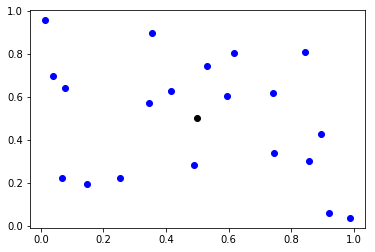

In [10]:
e = 0
des = env[e]
start = np.random.rand(1,2)
start[0] = [0.5,0.5]
cc = np.concatenate((start, des), axis=0)
plt.figure(0)
plt.plot(start[:,0], start[:,1],'ko',des[:,0], des[:,1],'bo')

# Map=1

In [11]:
%%time
k = range(20)
distances = {}
for i,posi in enumerate(cc):
    for j,posj in enumerate(cc):
        if j>i:
            key = (i,j)
            distances[key] = math.sqrt(sum( (posi-posj) ** 2 ))

results_2 = (Parallel(n_jobs=-1)(delayed(genetic)(cc,distances) for i in k))

Wall time: 6min 2s


17.743293200849248 1
15.550633971774479 6


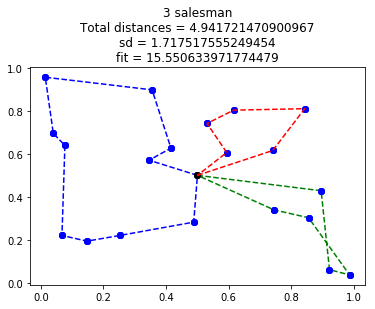

In [12]:
m , n = results_2[0][0].fit() ,0
for i in range(20):
#     print(results_2[i][0].fit())
    if m > results_2[i][0].fit():
        m, n = results_2[i][0].fit(),i 
        print(m,n)
        
        
results_2[n][0].showGraphs()

# Map=2

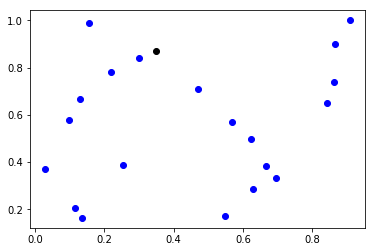

In [13]:
e = 1
des = env[e]
start = np.random.rand(1,2)
start[0] = [0.34922018,0.86928191]
cc = np.concatenate((start, des), axis=0)
plt.figure(0)
plt.plot(start[:,0], start[:,1],'ko',des[:,0], des[:,1],'bo')

In [14]:
%%time
k = range(20)
distances = {}
for i,posi in enumerate(cc):
    for j,posj in enumerate(cc):
        if j>i:
            key = (i,j)
            distances[key] = math.sqrt(sum( (posi-posj) ** 2 ))

results_2 = (Parallel(n_jobs=-1)(delayed(genetic)(cc,distances) for i in k))

Wall time: 5min 57s


19.79497354477487 2
13.447366779866494 4
10.282486417867721 5


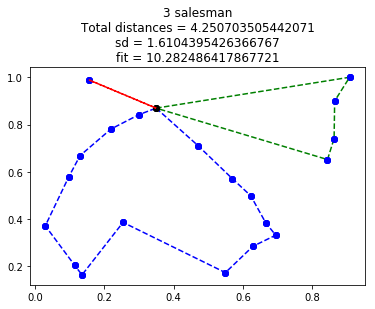

In [15]:
m , n = results_2[0][0].fit() ,0
for i in range(20):
#     print(results_2[i][0].fit())
    if m > results_2[i][0].fit():
        m, n = results_2[i][0].fit(),i 
        print(m,n)
        
        
results_2[n][0].showGraphs()

# Map=3

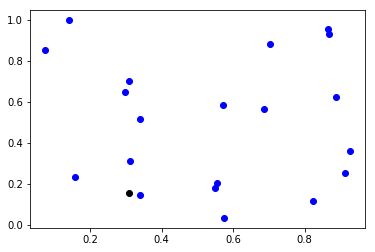

In [16]:
e = 2
des = env[e]
start = np.random.rand(1,2)
start[0] = [0.30889122,0.15268016]
cc = np.concatenate((start, des), axis=0)
plt.figure(0)
plt.plot(start[:,0], start[:,1],'ko',des[:,0], des[:,1],'bo')

In [17]:
%%time
k = range(20)
distances = {}
for i,posi in enumerate(cc):
    for j,posj in enumerate(cc):
        if j>i:
            key = (i,j)
            distances[key] = math.sqrt(sum( (posi-posj) ** 2 ))

results_2 = (Parallel(n_jobs=-1)(delayed(genetic)(cc,distances) for i in k))

Wall time: 5min 31s


22.384725812389973 1
20.54802862965119 4
20.20394993619667 5
19.186707185121204 7


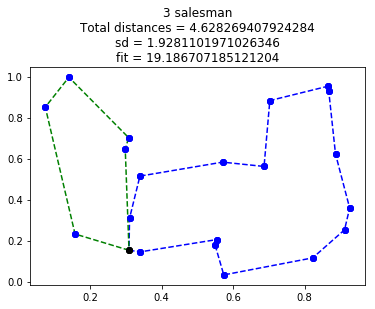

In [18]:
m , n = results_2[0][0].fit() ,0
for i in range(20):
#     print(results_2[i][0].fit())
    if m > results_2[i][0].fit():
        m, n = results_2[i][0].fit(),i 
        print(m,n)
        
        
results_2[n][0].showGraphs()

# Map=4

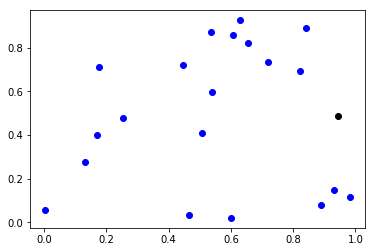

In [19]:
e = 3
des = env[e]
start = np.random.rand(1,2)
start[0] = [0.94488033,0.48640294]
cc = np.concatenate((start, des), axis=0)
plt.figure(0)
plt.plot(start[:,0], start[:,1],'ko',des[:,0], des[:,1],'bo')

In [20]:
%%time
k = range(20)
distances = {}
for i,posi in enumerate(cc):
    for j,posj in enumerate(cc):
        if j>i:
            key = (i,j)
            distances[key] = math.sqrt(sum( (posi-posj) ** 2 ))

results_2 = (Parallel(n_jobs=-1)(delayed(genetic)(cc,distances) for i in k))

Wall time: 5min 26s


40.44558141409087 1
35.727381283539316 3
25.03043315368022 4


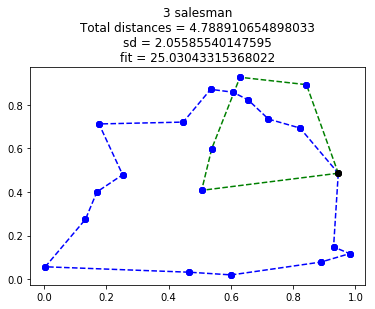

In [21]:
m , n = results_2[0][0].fit() ,0
for i in range(20):
#     print(results_2[i][0].fit())
    if m > results_2[i][0].fit():
        m, n = results_2[i][0].fit(),i 
        print(m,n)
        
        
results_2[n][0].showGraphs()

# Map=5

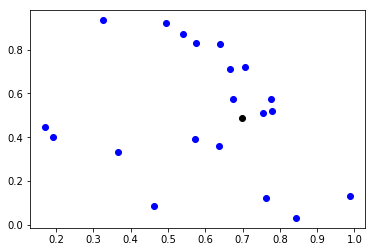

In [22]:
e = 4
des = env[e]
start = np.random.rand(1,2)
start[0] = [0.69911003,0.48697096]
cc = np.concatenate((start, des), axis=0)
plt.figure(0)
plt.plot(start[:,0], start[:,1],'ko',des[:,0], des[:,1],'bo')

In [23]:
%%time
k = range(20)
distances = {}
for i,posi in enumerate(cc):
    for j,posj in enumerate(cc):
        if j>i:
            key = (i,j)
            distances[key] = math.sqrt(sum( (posi-posj) ** 2 ))

results_2 = (Parallel(n_jobs=-1)(delayed(genetic)(cc,distances) for i in k))

Wall time: 4min 43s


7.668160932195387 1
6.697940160265084 10
6.386586813204082 17


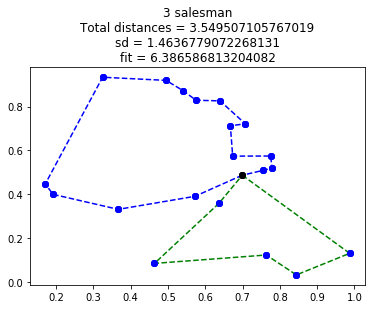

In [24]:
m , n = results_2[0][0].fit() ,0
for i in range(20):
#     print(results_2[i][0].fit())
    if m > results_2[i][0].fit():
        m, n = results_2[i][0].fit(),i 
        print(m,n)
        
        
results_2[n][0].showGraphs()